# Regularized multinomial logit model (using the LASSO penalty) and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv("mnist.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [25]:
X = df.drop(["label"], axis=1)
y = df["label"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=37000)

X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# using saga because lbfgs does not support L1 (lasso) penalty
# tolerance is higher to allow for faster convergence
# cv: folds, C: complexity
LR = LogisticRegressionCV(solver='saga', 
                        multi_class='multinomial', 
                        penalty='l1', 
                        cv=10,
                        tol=0.1, 
                        Cs=10)

LR.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='saga', tol=0.1, verbose=0)

In [68]:
# Training accuracy
LR.score(X_train, y_train)

0.9174

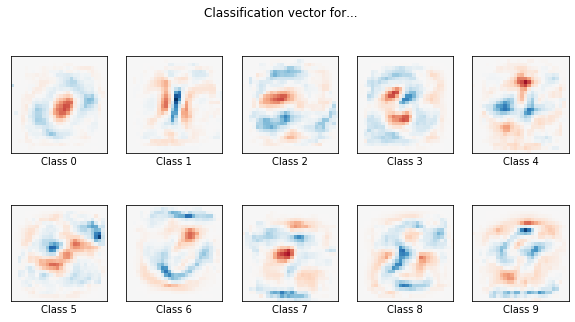

In [66]:
# copied from internet: 
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

coef = LR.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

plt.show()

# Support vector machines